In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
%pwd


'c:\\Development\\Data-Science-Dev\\03.JupyterNotebook_Pandas with CSV'

In [30]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B8A7-ECE4

 c:\Development\Data-Science-Dev\03.JupyterNotebook_Pandas with CSV ���͸�

2022-11-22  ���� 08:28    <DIR>          .
2022-11-22  ���� 08:18    <DIR>          ..
2022-11-22  ���� 08:13           186,414 house_prices.csv
2022-11-22  ���� 08:25                 8 random.txt
2022-11-22  ���� 08:11            11,061 readCSV.ipynb
2022-11-22  ���� 08:25                51 sample1.csv
2022-11-22  ���� 08:28                52 sample2.csv
               5�� ����             197,586 ����Ʈ
               2�� ���͸�  136,093,212,672 ����Ʈ ����


In [31]:
%%time
for i in range(1000000):
    continue

CPU times: total: 15.6 ms
Wall time: 21 ms


In [32]:
! python --version

Python 3.10.5


In [33]:
%%writefile random.txt
abcdef

Overwriting random.txt


In [34]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B8A7-ECE4

 c:\Development\Data-Science-Dev\03.JupyterNotebook_Pandas with CSV ���͸�

2022-11-22  ���� 08:28    <DIR>          .
2022-11-22  ���� 08:18    <DIR>          ..
2022-11-22  ���� 08:13           186,414 house_prices.csv
2022-11-22  ���� 10:49                 8 random.txt
2022-11-22  ���� 08:11            11,061 readCSV.ipynb
2022-11-22  ���� 08:25                51 sample1.csv
2022-11-22  ���� 08:28                52 sample2.csv
               5�� ����             197,586 ����Ʈ
               2�� ���͸�  136,093,208,576 ����Ʈ ����


In [35]:
with open('random.txt','r', encoding='utf8') as f:
    print(f.read())

abcdef



In [36]:
%%writefile sample1.csv
c1,c2,c3
1,1.11,one 
2,2.22,two 
3,3.33,three 

Overwriting sample1.csv


In [37]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B8A7-ECE4

 c:\Development\Data-Science-Dev\03.JupyterNotebook_Pandas with CSV ���͸�

2022-11-22  ���� 08:28    <DIR>          .
2022-11-22  ���� 08:18    <DIR>          ..
2022-11-22  ���� 08:13           186,414 house_prices.csv
2022-11-22  ���� 10:49                 8 random.txt
2022-11-22  ���� 08:11            11,061 readCSV.ipynb
2022-11-22  ���� 10:49                51 sample1.csv
2022-11-22  ���� 08:28                52 sample2.csv
               5�� ����             197,586 ����Ʈ
               2�� ���͸�  136,093,208,576 ����Ʈ ����


In [38]:
with open('sample1.csv','r', encoding='utf8') as f:
    print(f.read())

c1,c2,c3
1,1.11,one 
2,2.22,two 
3,3.33,three 



In [39]:
contents = '''
c1,c2,c3
1,1.11,one 
2,2.22,two 
3,3.33,three
'''
with open('sample2.csv','w') as f:
    f.write(contents)

In [40]:
df1 = pd.read_csv('sample1.csv')

In [41]:
pd.read_csv('sample1.csv', index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [42]:
df1.set_index('c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [43]:
%%writefile sample3.txt
c1/c2/c3
1/1.11/one
2/2.22/two
3/3.33/three

Writing sample3.txt


In [45]:
# how to read file that is seperated with '/'
pd.read_csv('sample3.txt',sep='/')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [48]:
pd.read_csv('sample1.csv',names=['d1','d2','d3'])

,d1,d2,d3
0,c1,c2,c3
1,1,1.11,one
2,2,2.22,two
3,3,3.33,three


In [49]:
pd.read_csv('sample1.csv',names=['d1','d2','d3'],skiprows=[0])

,d1,d2,d3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [50]:
%%writefile sample4.csv
c1,c2,c3
1,1.11,error
2,error,two
3,error,three

Writing sample4.csv


In [51]:
pd.read_csv('sample4.csv')

,c1,c2,c3
0,1,1.11,error
1,2,error,two
2,3,error,three


In [52]:
# Could change the error value before using the dataset
# na_values=[Inside could be multiple things]
pd.read_csv('sample4.csv',na_values=['error']) 

,c1,c2,c3
0,1,1.11,NaN
1,2,NaN,two
2,3,NaN,three


In [53]:
sample4= pd.read_csv('sample4.csv',na_values=['error',0,1]) 
sample4

,c1,c2,c3
0,NaN,1.11,NaN
1,2.0,NaN,two
2,3.0,NaN,three


In [55]:
sample4= sample4.fillna(0)
sample4

,c1,c2,c3
0,0.0,1.11,0
1,2.0,0.00,two
2,3.0,0.00,three


In [57]:
sample4['c4']=[1,2,3]
sample4

,c1,c2,c3,c4
0,0.0,1.11,0,1
1,2.0,0.00,two,2
2,3.0,0.00,three,3


In [59]:
sample4.to_csv('sample4_v2.csv',sep=',')

In [60]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B8A7-ECE4

 c:\Development\Data-Science-Dev\03.JupyterNotebook_Pandas with CSV ���͸�

2022-11-22  ���� 11:42    <DIR>          .
2022-11-22  ���� 08:18    <DIR>          ..
2022-11-22  ���� 08:13           186,414 house_prices.csv
2022-11-22  ���� 10:49                 8 random.txt
2022-11-22  ���� 11:40            20,482 readCSV.ipynb
2022-11-22  ���� 10:49                51 sample1.csv
2022-11-22  ���� 10:49                52 sample2.csv
2022-11-22  ���� 10:50                48 sample3.txt
2022-11-22  ���� 11:38                52 sample4.csv
2022-11-22  ���� 11:45                66 sample4_v2.csv
               8�� ����             207,173 ����Ʈ
               2�� ���͸�  136,041,390,080 ����Ʈ ����


In [61]:
pd.read_csv('sample4_v2.csv', header=None)

,0,1,2,3,4
0,NaN,c1,c2,c3,c4
1,0.0,0.0,1.11,0,1
2,1.0,2.0,0.0,two,2
3,2.0,3.0,0.0,three,3


In [63]:
%pwd

'c:\\Development\\Data-Science-Dev\\03.JupyterNotebook_Pandas with CSV'

In [67]:
# Load House Price
hp_df=pd.read_csv('house_prices.csv')

#Print top 5
hp_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [68]:
#Print lowest 5
hp_df.tail()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
6023,4373,B,757,0,0,lodge,385420
6024,4422,C,3540,5,3,victorian,890627
6025,5894,B,1518,2,1,lodge,760829
6026,5591,C,2270,4,2,ranch,575515
6027,6211,C,3355,5,3,victorian,844747


In [76]:
# printing option setting
pd.set_option('display.max_rows',10) #default is 10

In [77]:
hp_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [78]:
!pip install pandas-datareader

You should consider upgrading via the 'C:\Users\tempe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [83]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012,1,1)
end=datetime.datetime(2022,1,1)
gdp=web.DataReader('GDP','fred',start,end)

In [84]:
gdp

,GDP
DATE,
2012-01-01,16068.824
2012-04-01,16207.130
2012-07-01,16319.540
2012-10-01,16420.386
2013-01-01,16629.050
...,...
2021-01-01,22313.850
2021-04-01,23046.934
2021-07-01,23550.420


<AxesSubplot: xlabel='DATE'>

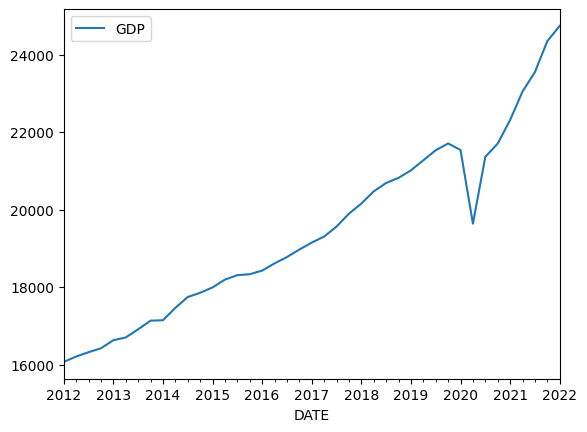

In [85]:
gdp.plot()